<a href="https://colab.research.google.com/github/limph0nimph/DSE-23-24/blob/main/03-classes/DS_ICEF_class3_trees_with_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This class is about classification and Decision trees

#Decision Tree Theory

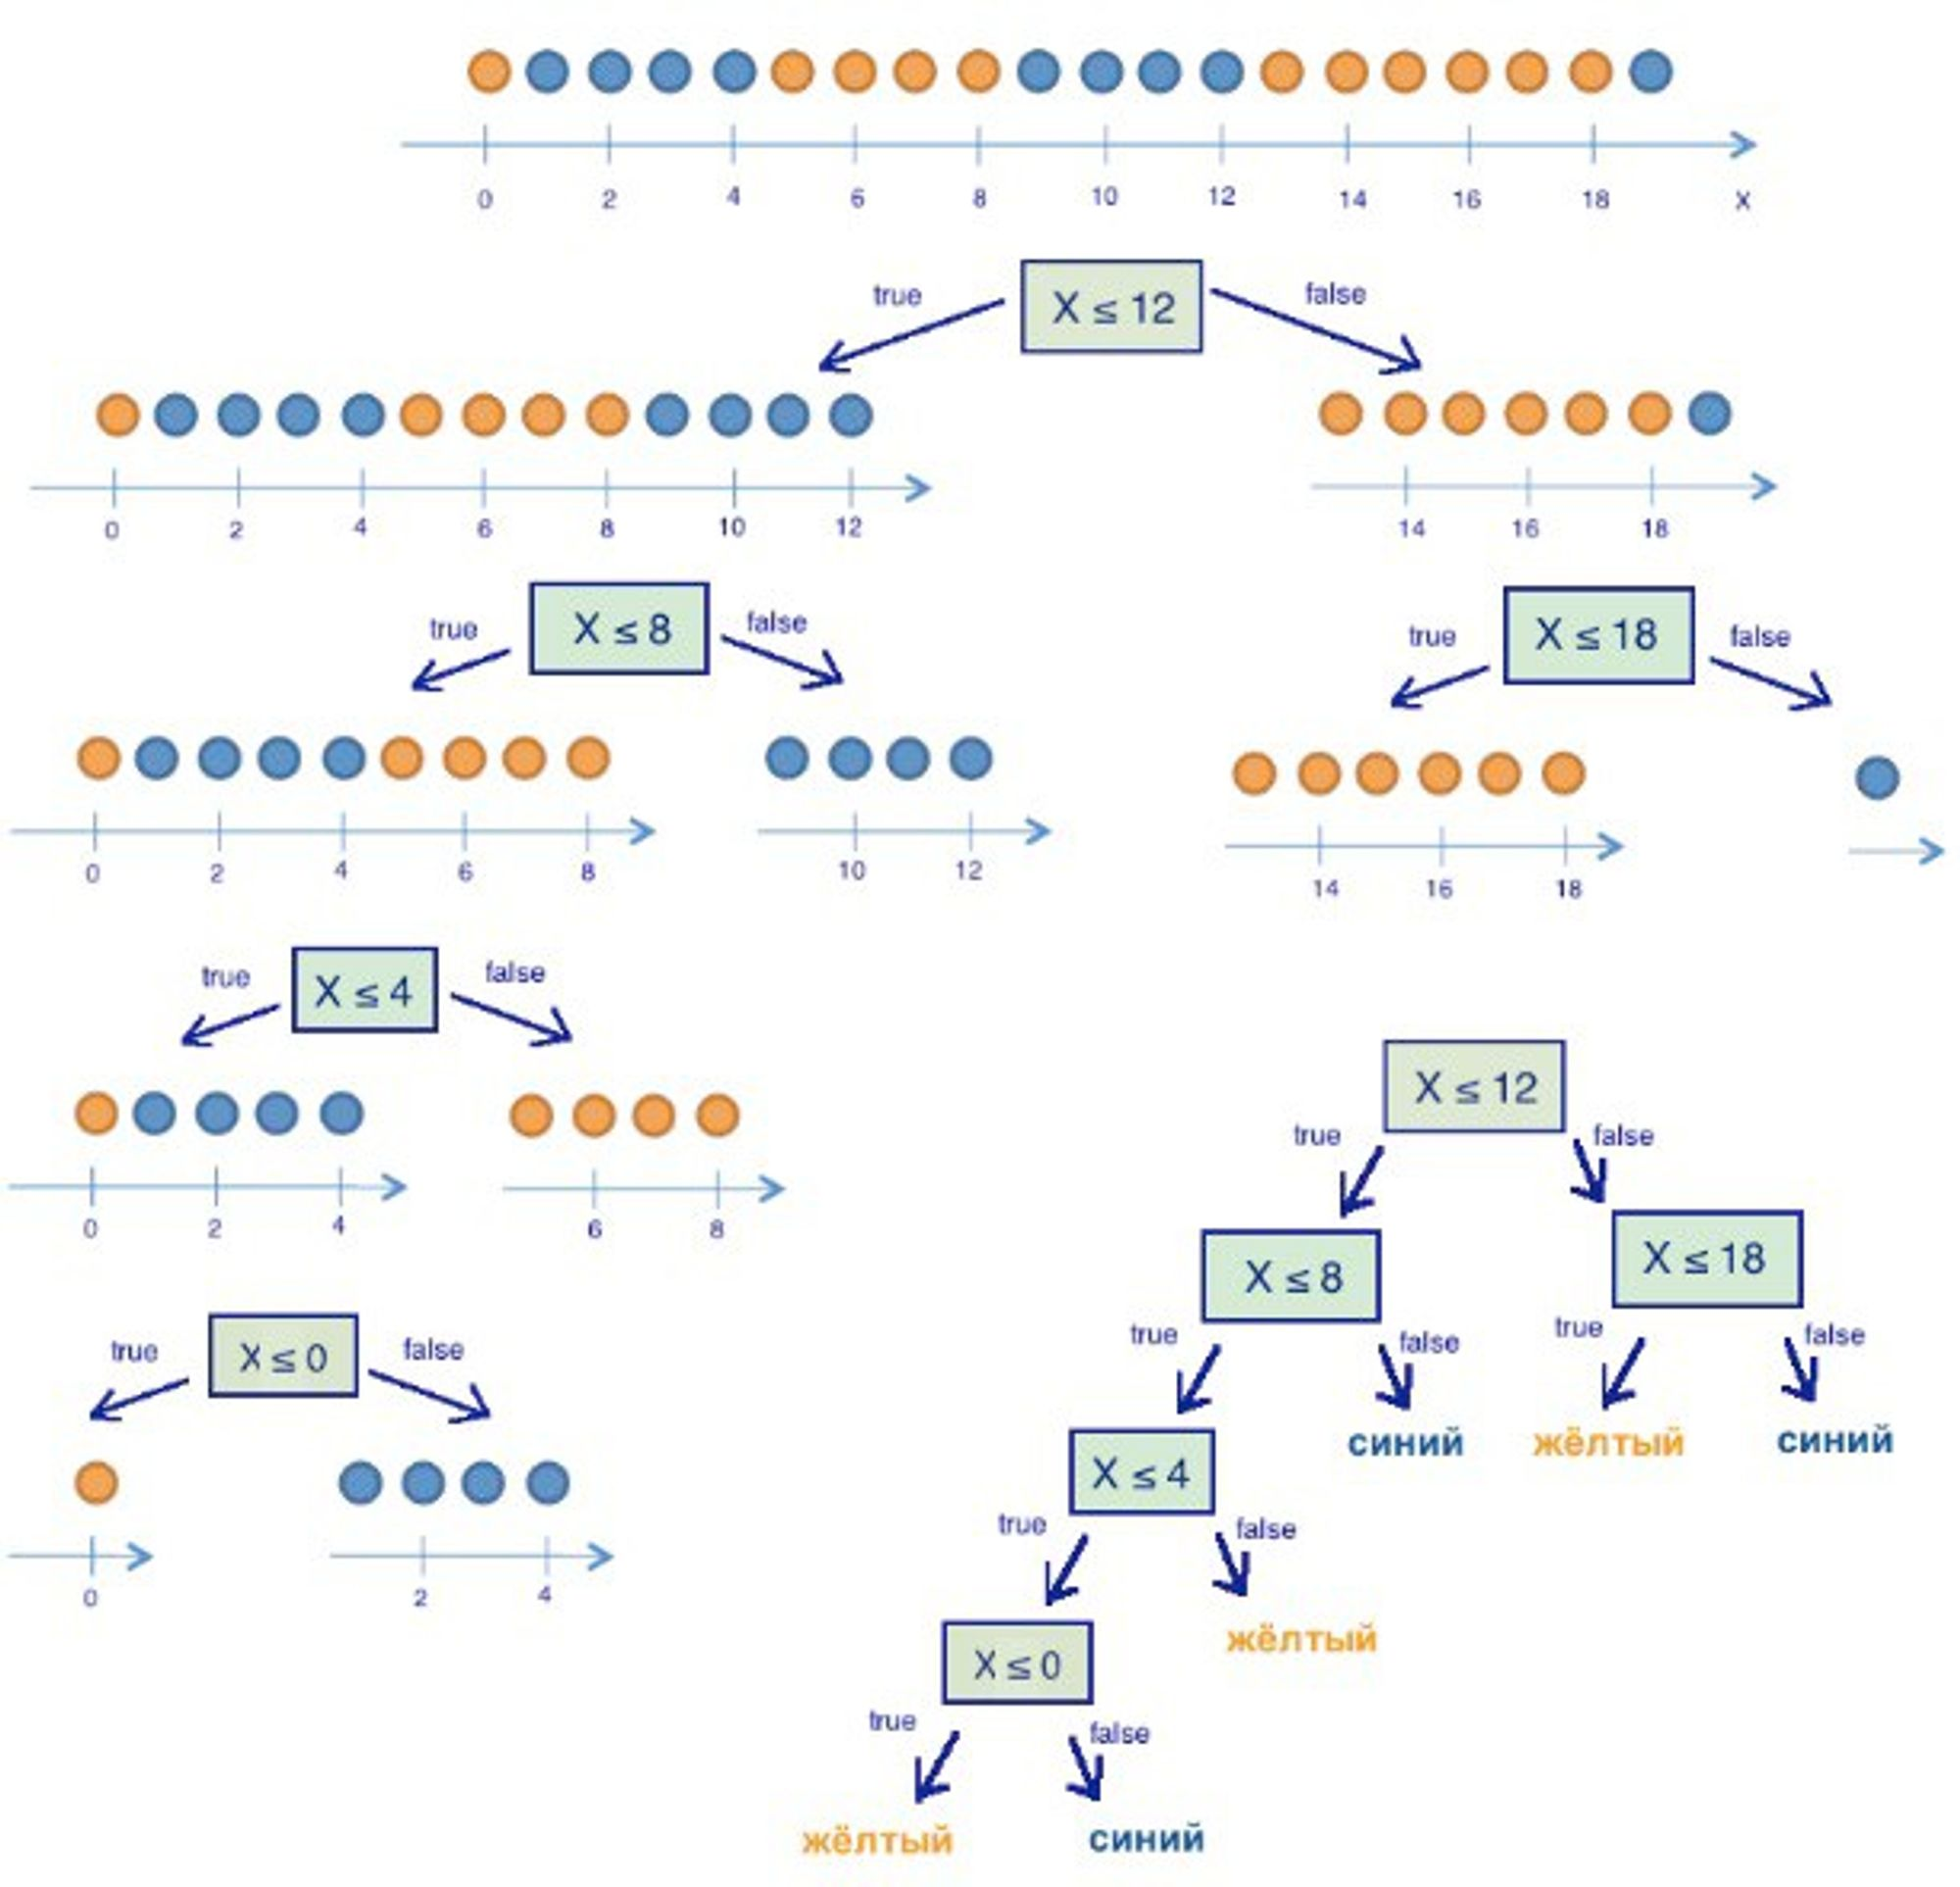

Solution of building a decision tree c;assifier using entropy criteris:

$$P(y=\text{BLUE}) = \frac{9}{20} = 0.45$$
$$P(y=\text{YELLOW}) = \frac{11}{20} = 0.55$$


> After the first split: left tree: $X\leq 12$ , right tree $X> 12$
>

$$P(y=\text{BLUE}|X\leq 12) = \frac{8}{13} \approx 0.62$$
$$P(y=\text{BLUE}|X> 12) = \frac{1}{7} \approx 0.14$$

$$P(y=\text{YELLOW}|X\leq 12) = \frac{5}{13} \approx 0.38$$
$$P(y=\text{YELLOW}|X > 12) = \frac{6}{7} \approx 0.86$$


## Entropy

$$
H(p) = - \sum_i^K p_i\log(p_i)
$$

> Before the first split
>

$$H_{\text{parent}} = - 0.45 \log 0.45 - 0.55 \log 0.55 \approx 0.69 $$

> After the first split
>

$$H_{\text{left}} = - 0.62 \log 0.62 - 0.38 \log 0.38 \approx 0.66$$

$$H_{\text{right}} = - 0.14 \log 0.14 - 0.86 \log 0.86 \approx 0.40$$





$|R|$ number of elements in right tree, $|L|$ number of elements in left tree after the split, $|T|$ number of elements befrore the split


$$H_{\text{child}} = \frac{|L|}{|T|} H_{\text{left}} +\frac{|R|}{|T|}  H_{\text{right}} = \frac{13}{20} 0.66 +\frac{7}{20} 0.40 \approx 0.57$$
## Information Gain

$$
IG = H(\text{parent}) -\frac{|L|}{|T|} H_{\text{left}} -\frac{|R|}{|T|}  H_{\text{right}}   = H(\text{parent}) - H(\text{child})
$$

$$IG = 0.69 - 0.57 = 0.12$$

#Decision Tree building

The decision tree is a machine learning algorithm defined by a special binary tree. Each inner vertex(вершина) of such a tree corresponds to the function predicate $\mathbb{I}[x_{\alpha}\geq\beta]$, this means the condition that feature(column) with name $\alpha$ is larget or equal than threshold value \beta. Each leaf vertex corresponds to some answer value that the algorithm will output (a real number in the case of regression, a class number or a probability vector in the case of classification).

At the training stage, we need to build the tree itself, and also select feature name $\alpha$ and threshold $\beta$ for each internal vertex and a prediction label for each leaf vertex. The task of constructing the "best" tree (for example, the one that does not make mistakes and has the minimum number of vertices) requires us taking into account  all combinations, which is comutationally takes a lot of time, so when building trees we only cntruct tree finding best split on each step.

At the application stage, all objects are passed through the tree. Initially, the value of the predicate function of the root vertex is calculated for each object. If it is zero, then the algorithm moves to the left child vertex, otherwise to the right. Then the value of the predicate in the new vertex is calculated and a transition is made either to the left or to the right. The process continues until the leaf vertex is reached. The algorithm returns the value that will be assigned to this vertex.

How to find best split for a tree
### Choosing $\alpha$ and $\beta$

At the stage of building the tree, we will choose predicates for each new vertex, maximizing the quality functional for splitting the vertex into two subtrees, which can be written as follows:
$$Q(R, \alpha, \beta) = H(R) - \frac{|R_l|}{|R|} H(R_l) - \frac{|R_r|}{|R|} H(R_r) $$

* $H$ - the criterion of informativeness
* $R$ - objects at the current vertex
* $R_r$ - objects that fall into the right subtree
* $R_l$ - objects falling into the left subtree

For example, the Gini information criterion for the classification problem:

$$ H(R) = \sum_{k=1}^K p_k (1 - p_k) = 1 - \sum_{k=1}^K p_k^2 $$

* $p_k$ - the proportion of objects with class $k$ among $R$
* $K$ - total number of classes

When splitting a vertex into two subtrees, we want to maximize the quality functionality by optimizing:

* $\alpha$ - attribute number in the predicate
* $\beta$ - threshold value of the predicate

In this task, we will optimize using a full iteration of values. For $\alpha$, the set of iterated values is all the available features, for $\beta$ - all the values of each feature found in the training sample, except the smallest and largest.

#Decison Trees in sklearn

Our third class. will bee devoted to classification problem and DEcision tree classifier:

Let us load data

In [ ]:
!wget -c https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/01-classes/flats_moscow.csv


--2023-09-19 10:39:22--  https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/01-classes/flats_moscow.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66976 (65K) [text/plain]
Saving to: ‘flats_moscow.csv’

flats_moscow.csv    100%[===================>]  65.41K  --.-KB/s    in 0.002s  

2023-09-19 10:39:22 (35.3 MB/s) - ‘flats_moscow.csv’ saved [66976/66976]



In [ ]:
import pandas as pd
flats = pd.read_csv("flats_moscow.csv")

In [ ]:
flats.head()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [ ]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2040 non-null   int64  
 1   price       2040 non-null   int64  
 2   totsp       2040 non-null   int64  
 3   livesp      2040 non-null   int64  
 4   kitsp       2040 non-null   float64
 5   dist        2040 non-null   float64
 6   metrdist    2040 non-null   int64  
 7   walk        2040 non-null   int64  
 8   brick       2040 non-null   int64  
 9   floor       2040 non-null   int64  
 10  code        2040 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 175.4 KB


Suppose we want to predict the walk variable:
to classify whether flat is within walking distance or not

In [ ]:
import sklearn


In [ ]:
flats.columns

Index(['Unnamed: 0', 'price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist',
       'walk', 'brick', 'floor', 'code'],
      dtype='object')

In [ ]:
flats.drop(columns= 'Unnamed: 0',inplace=True)

In [ ]:
flats.columns[flats.columns!="walk"]

Index(['price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist', 'brick',
       'floor', 'code'],
      dtype='object')

Define X and y

In [ ]:
y_flats = flats["walk"]
X_flats = flats[flats.columns[flats.columns!="walk"]]

Make classification using decision tree classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, criterion ="entropy" )

Fit a decision tree

In [ ]:
clf.fit(X = X_flats,y = y_flats)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[5] <= 3.5\nentropy = 0.898\nsamples = 2040\nvalue = [641, 1399]'),
 Text(0.25, 0.625, 'x[0] <= 111.5\nentropy = 0.155\nsamples = 223\nvalue = [5, 218]'),
 Text(0.125, 0.375, 'x[1] <= 78.5\nentropy = 0.362\nsamples = 58\nvalue = [4, 54]'),
 Text(0.0625, 0.125, 'entropy = 0.225\nsamples = 55\nvalue = [2, 53]'),
 Text(0.1875, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.375, 0.375, 'x[8] <= 7.5\nentropy = 0.053\nsamples = 165\nvalue = [1, 164]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 149\nvalue = [0, 149]'),
 Text(0.4375, 0.125, 'entropy = 0.337\nsamples = 16\nvalue = [1, 15]'),
 Text(0.75, 0.625, 'x[4] <= 5.5\nentropy = 0.934\nsamples = 1817\nvalue = [636, 1181]'),
 Text(0.625, 0.375, 'x[0] <= 166.0\nentropy = 0.304\nsamples = 129\nvalue = [7, 122]'),
 Text(0.5625, 0.125, 'entropy = 0.382\nsamples = 94\nvalue = [7, 87]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.875, 0.375, 'x[4] <= 12.85\nentropy = 0.9

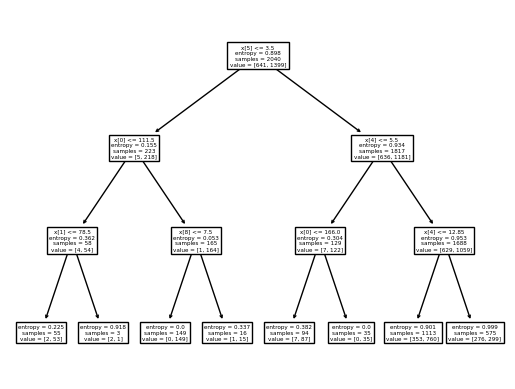

In [ ]:
sklearn.tree.plot_tree(clf)

Beatiful tree

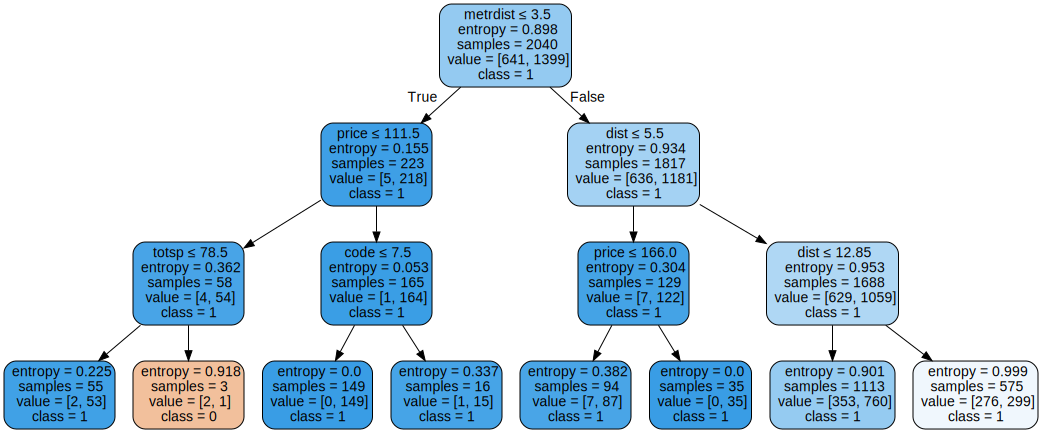

In [ ]:
import graphviz
dot_data = sklearn.tree.export_graphviz(clf, out_file=None,
                     feature_names=X_flats.columns,
                      class_names = ["0","1"],
                    filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

Let us look at how we can make our tree more stable

# Main Parametres of Decision tree
What we should take into account while constructing a decision tree:

*   max_depth is maximum depth of the tree
*   min_samples_leaf is the constrain on minimum number of elements in a leaf

Cost function:
* criterion{“gini”, “entropy”, “log_loss”}



Let us put constrain on min_samples_leaf = 5% of dataset

In [ ]:
clf2 = sklearn.tree.DecisionTreeClassifier(max_depth=5,
                                           min_samples_leaf=int(0.05*len(X_flats)),
                                           max_leaf_nodes = 10)

Fit tree

In [ ]:
clf2.fit(X_flats, y_flats)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=102)

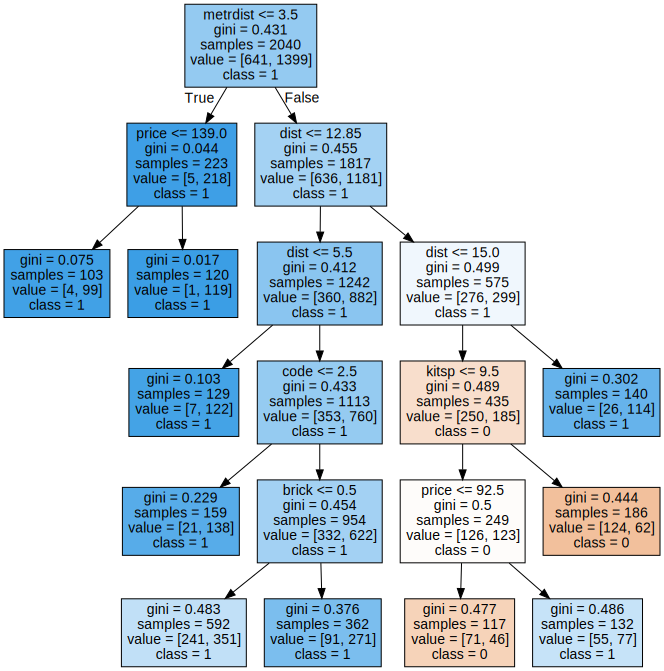

In [ ]:
import graphviz
dot_data = sklearn.tree.export_graphviz(clf2,
                     feature_names=X_flats.columns,
                      class_names = ["0","1"],
                                        filled = True,
                                        )
graph = graphviz.Source(dot_data)
graph

How to measure quality of classification:

Approach:



1.   On one part of dataset train your algorithm
2.  On test part evaluate classification and make prediction comparison with true data




# Decision tree Regression

Create a dataset:

Want create it manually using numpy library

A random sample of dimension 1 from donut distribution

In [ ]:
import matplotlib.pyplot as plt


Create X_data and plot it

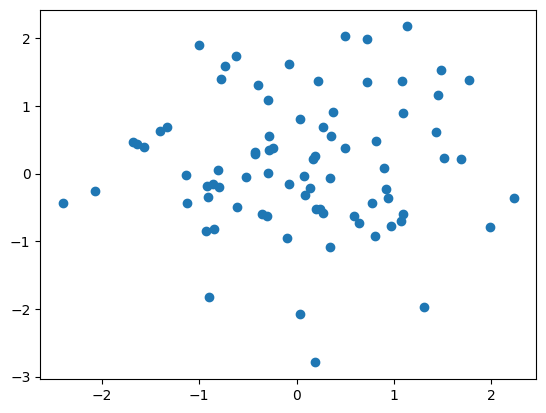

In [ ]:
import numpy as np
num_samples = 80
dimension = 2
X_data = np.random.normal(size = (num_samples, dimension))

#plot
plt.scatter(X_data[:, 0], X_data[:, 1])

In [ ]:
import numpy as np
y_data = X_data[:,1]**2 + X_data[:,0]**2

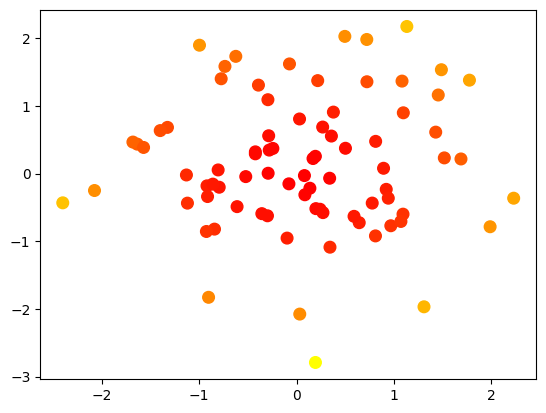

In [ ]:
plt.scatter(X_data[:, 0], X_data[:, 1],c=y_data, s = 70,cmap = "autumn")

In [ ]:
clf = sklearn.tree.DecisionTreeRegressor(random_state=24, )
clf.fit(X_data, y_data)

y_pred = clf.predict(X_data)
print(y_pred)

[9.41156372e-01 7.42840437e-03 2.89620552e+00 6.72715024e-01
 4.56825465e+00 5.58696778e+00 5.10363317e+00 1.53158582e+00
 3.08329535e-01 6.12926720e-01 1.96414704e-01 8.79755224e-01
 4.78736200e-01 5.42318953e-01 1.20180811e-01 2.74778209e-01
 4.56025976e+00 3.46074868e+00 5.95436083e+00 1.50552296e+00
 7.48163336e-01 2.35487637e+00 3.38356214e+00 4.15979945e+00
 4.34654497e+00 1.92887244e+00 2.62410467e+00 3.04377155e+00
 2.35798650e+00 3.03461922e+00 7.94090953e-01 7.82508873e+00
 9.02437387e-01 5.05142027e+00 1.55485213e+00 2.00520857e+00
 5.99636421e+00 4.37081281e+00 2.86475987e+00 8.84564164e-01
 4.33716527e-01 9.65119360e-01 1.01953848e+00 1.27458402e+00
 8.03509269e-01 1.30143983e+00 1.64925014e+00 3.36510281e-01
 2.22311887e+00 3.04147035e+00 1.01690809e-01 4.31033393e+00
 4.43659769e+00 4.58452172e+00 6.49534543e-01 3.92952568e-01
 2.94416353e-02 7.74116638e-02 1.98562021e-01 9.52037643e-01
 1.38558180e+00 2.64010681e-01 1.85717541e+00 6.59063305e-02
 4.79166707e-01 2.363042

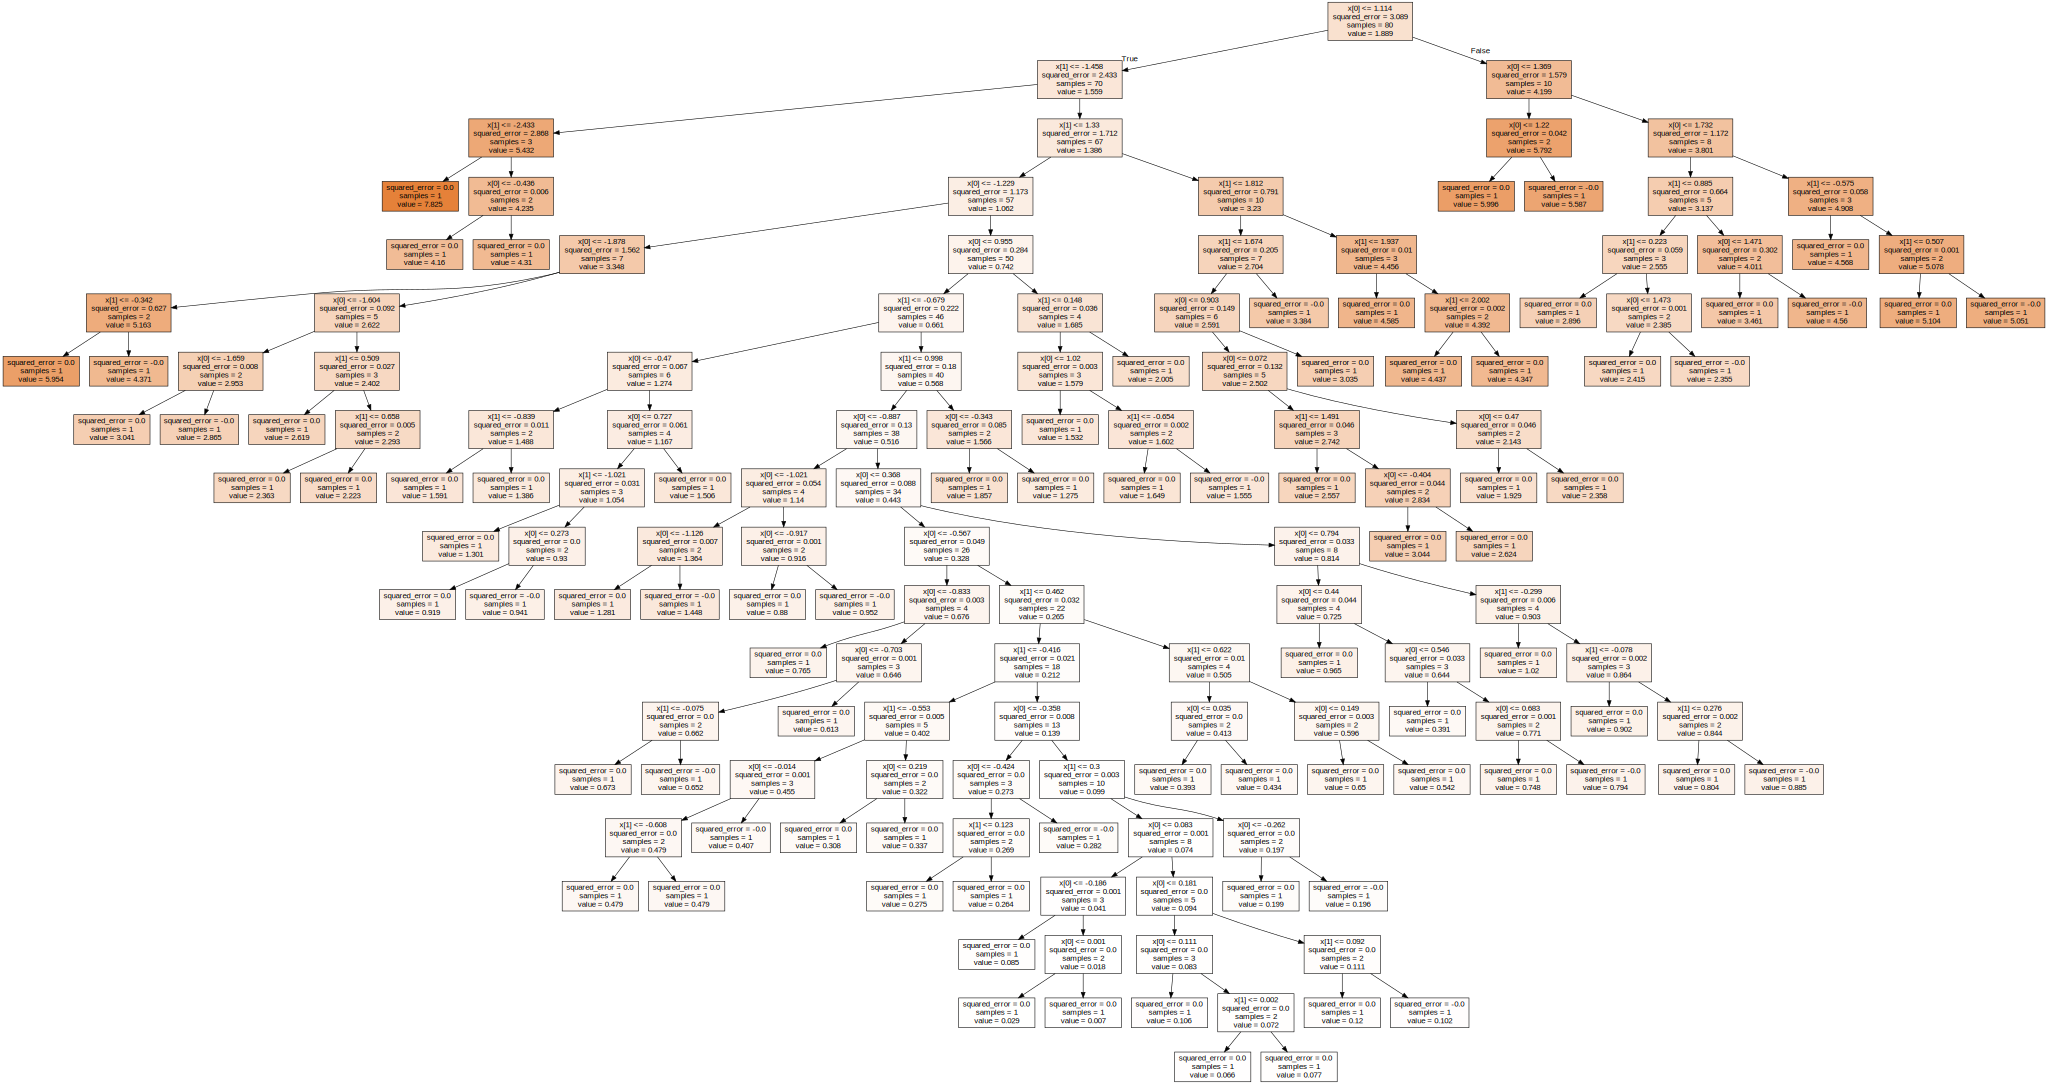

In [ ]:
import graphviz
dot_data = sklearn.tree.export_graphviz(clf,
                                        filled = True,
                                        )
graph = graphviz.Source(dot_data)
graph

##Visualisation (make look difficult in code, but it is mainly for your understanding of the visualization of a tree surface)

Create a meshgrid

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

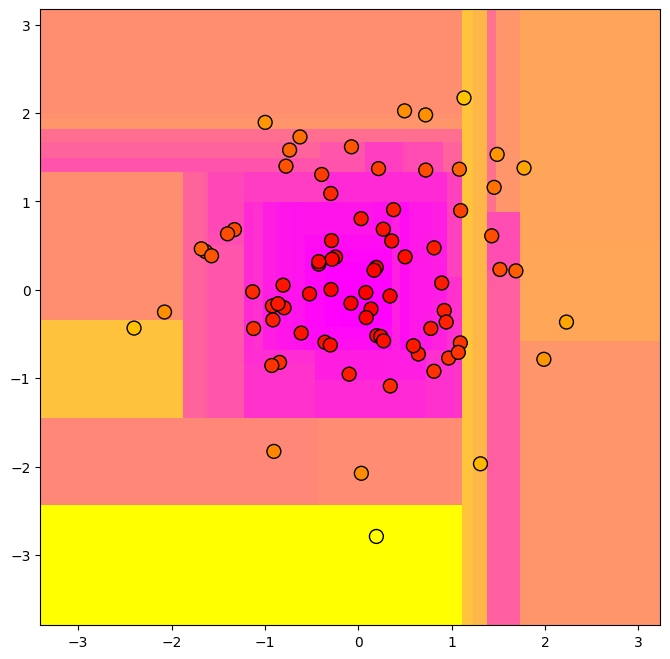

In [ ]:
xx, yy = get_grid(X_data)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, cmap='autumn', edgecolor='k')

In [ ]:
print(predicted)

[[7.82508873 7.82508873 7.82508873 ... 4.56825465 4.56825465 4.56825465]
 [7.82508873 7.82508873 7.82508873 ... 4.56825465 4.56825465 4.56825465]
 [7.82508873 7.82508873 7.82508873 ... 4.56825465 4.56825465 4.56825465]
 ...
 [4.34654497 4.34654497 4.34654497 ... 5.05142027 5.05142027 5.05142027]
 [4.34654497 4.34654497 4.34654497 ... 5.05142027 5.05142027 5.05142027]
 [4.34654497 4.34654497 4.34654497 ... 5.05142027 5.05142027 5.05142027]]


Now let us vary number of parametres in a list

In [ ]:
#plotting size of a figure


<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

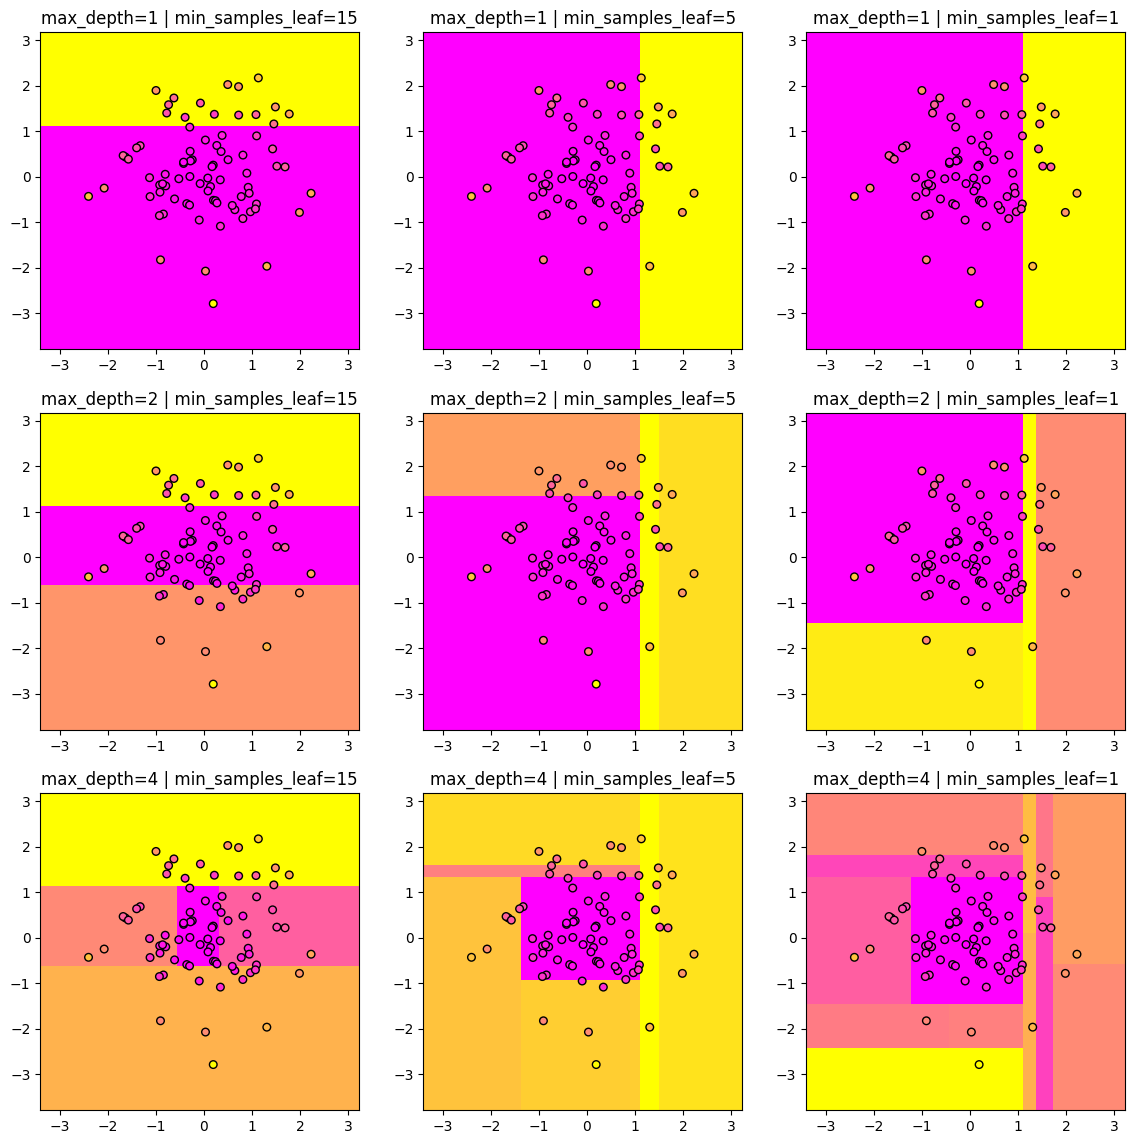

In [ ]:
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([1, 2, 4]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):

        clf = sklearn.tree.DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(X_data, y_data)
        xx, yy = get_grid(X_data)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=30, cmap='spring', edgecolor='k')
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

##Decision trees are not stable and can overfit over data very strongly

We train on subset of 90% of dataset

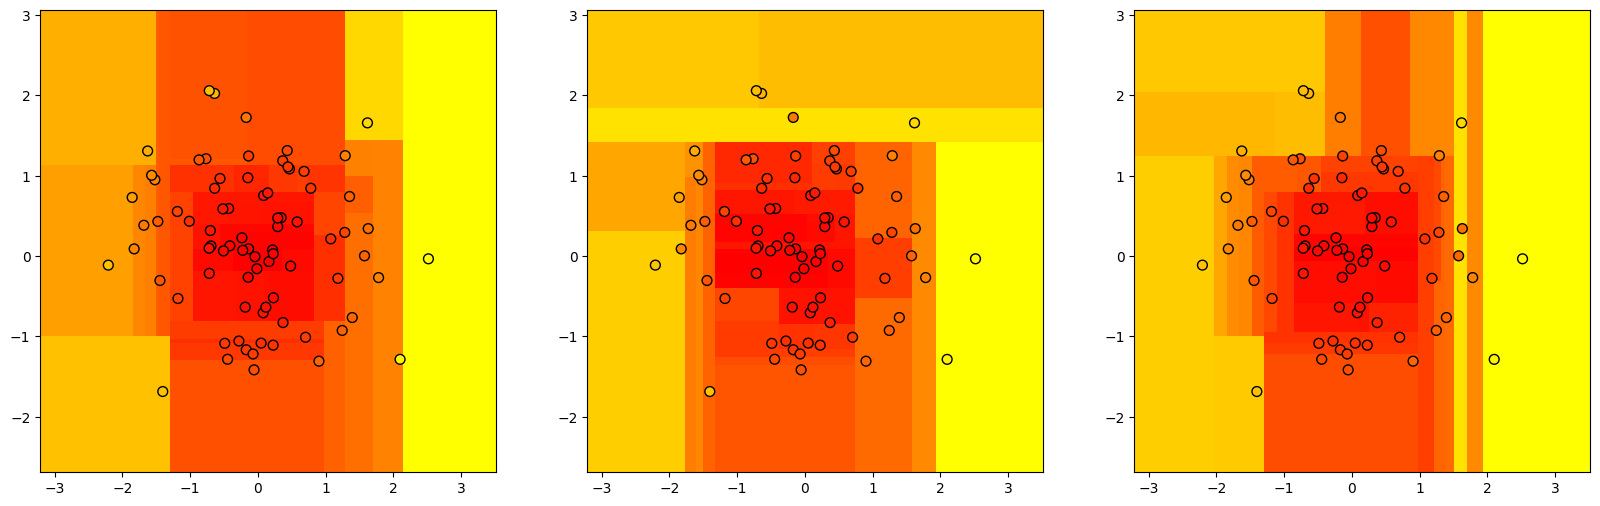

In [ ]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = sklearn.tree.DecisionTreeRegressor(random_state=42)

    indecies = np.random.randint(X_data.shape[0], size=int(X_data.shape[0] * 0.9))
    clf.fit(X_data[indecies], y_data[indecies])
    xx, yy = get_grid(X_data)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='autumn')
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=50, cmap='autumn', edgecolor='k')

##Advanced task for python gurus:
implement your DecisionTree stump:(a tree with max depth = 1)

In [ ]:
class Decision_Stump:
	def __init__(self, threshold_freq=0.1):
			pass
	def fit(self, X, y):
   pass

	def find_best_split(self, X):
   pass

  def predict_proba(self, X_test):
   pass

  def predict(self, X_test):
   pass

#Classification
Metrics of classification:


*   Accuracy
*   Precision
*   Recall
*   ROC AUC



## Precision and Recall

Precision and Recall are two other measures for evaluation of classification quality. Both of the metrics are calculated based on **confusion matrix**.

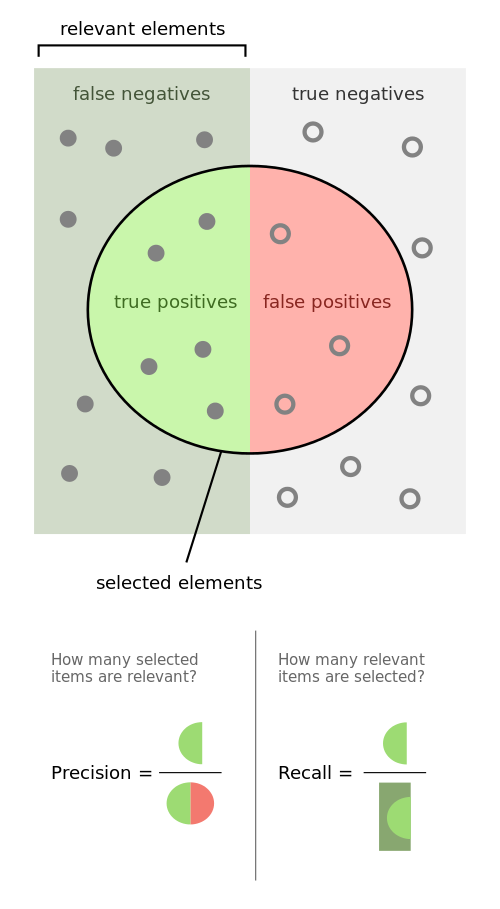<img

Note that Recall equals to True Positive Rate.

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_flats, y_flats, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_flats = DecisionTreeClassifier(criterion=
                                   "entropy",max_depth= 3)
clf_flats.fit(X_train,y_train)

y_flats_pred = clf_flats.predict(X_test)

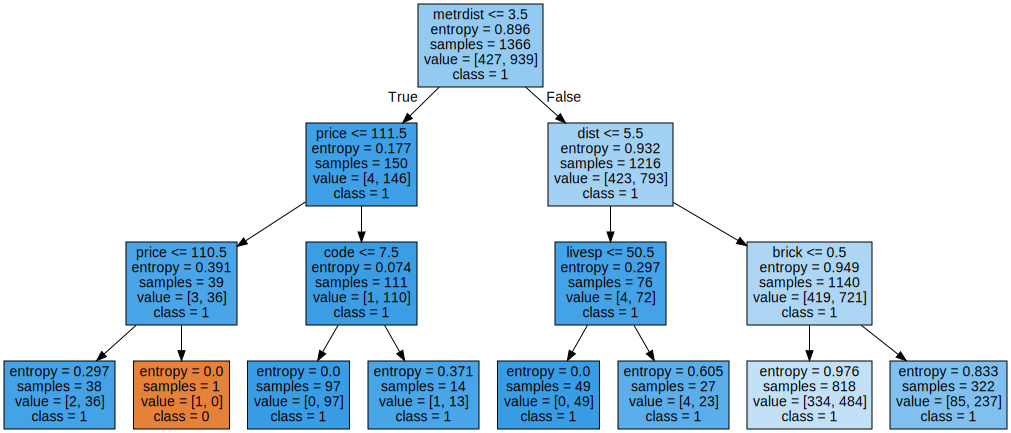

In [ ]:
import graphviz
dot_data = sklearn.tree.export_graphviz(clf_flats,
                     feature_names=X_train.columns,
                      class_names = ["0","1"],
                                        filled = True,
                                        )
graph = graphviz.Source(dot_data)
graph

In [ ]:
clf_flats.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
clf_flats.predict_proba(X_test)

array([[0.40831296, 0.59168704],
       [0.40831296, 0.59168704],
       [0.        , 1.        ],
       ...,
       [0.26397516, 0.73602484],
       [0.40831296, 0.59168704],
       [0.40831296, 0.59168704]])

The accuracy on the test dataset:

In [ ]:
sklearn.metrics.accuracy_score(y_true=y_train, y_pred = clf_flats.predict(X_train))

0.6881405563689604

In [ ]:
sklearn.metrics.accuracy_score(y_true=y_test, y_pred = y_flats_pred)

0.6810089020771514

In [ ]:
def my_accuracy(y_true,y_pred):
  return len(y_test[y_true==y_pred])/len(y_true)

##Recall precison accuracy solution(spoilers here)

In [ ]:
def my_accuracy(y_true,y_pred):
  return len(y_test[y_true==y_pred])/len(y_true)

In [ ]:
def my_precision(y_true, y_pred):
  num_class_as_1 = sum(y_pred)
  True_Positive = sum(y_true*y_pred)
  return True_Positive/num_class_as_1

In [ ]:
def my_recall(y_true, y_pred):
  num_TRUEs = sum(y_true)
  True_Positive = sum(y_true*y_pred)
  return True_Positive/num_TRUEs

Calculate metrics and intpret them

In [ ]:
my_recall(y_true= y_test,y_pred = y_flats_pred)

0.808695652173913

In [ ]:
my_precision(y_true= y_test,y_pred = y_flats_pred)

0.8017241379310345

In [ ]:
my_accuracy(y_true= y_test,y_pred = y_flats_pred)

0.7329376854599406

#Presision recall curve curve

## Confusion matrix

Confusion matrix is table layout that allows visualization of the performance of an algorithm. Rows of this matrix correspond to actual classes of the test set, columns correspond to predicted labels. There are 4 types of elements if predictions are given:
* True Positive
* False Negative
* False Positive
* True Negative

| Variable | Predicted True | Predicted False |
| ------------- |-------------|-----|
| **Actual True**  | TP | FN |
| **Actual False** | FP | TN |


If we want to compare metrics on different data, we can use instead True Positive Rate and False Positive Rate:
* False Positive Rate is $\frac{FP}{FP + TN}$
* True  Positive Rate is $\frac{TP}{TP + FN}$

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true= y_test, y_pred = y_flats_pred)
TN, FP = confusion[0, 0], confusion[0, 1]
FN, TP = confusion[1, 0], confusion[1, 1]

In [ ]:
print(confusion)

[[122  92]
 [ 88 372]]


In [ ]:
recall = TP / (TP + FN)
print("check recall ",recall)

0.808695652173913


In [ ]:
precision = TP / (TP + FP)

print("Precision: %.2f%%" % (100 * precision))

Precision: 80.17%


Also the classsifier can predic probaility by
methoc predict_proba

In [ ]:
training_probabilities_dt = clf_flats.predict_proba(X = X_train)

test_probailities =  clf_flats.predict_proba(X = X_test)
print(training_probabilities_dt)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [ ]:
print(clf_flats.classes_)

[0 1]


In [ ]:
training_probabilities_dt[:,1]

array([1., 1., 1., ..., 1., 1., 0.])

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve

In [ ]:
# generate values for training Precision Recall curve
training_precision_dt, training_recall_dt, tresholds_train = precision_recall_curve(y_train, training_probabilities_dt[:,1])

# TODO calculate value under precision-recall curve
training_pr_auc_dt = average_precision_score(y_train, training_probabilities_dt[:,1])

print("DT PR-AUC on training data:", training_pr_auc_dt)


DT PR-AUC on training data: 1.0


In [ ]:
# generate values for test Precision Recall curve
test_precision_dt, test_recall_dt, tresholds_test = precision_recall_curve(y_test, test_probailities[:,1])

# TODO calculate value under test precision-recall curve
test_pr_auc_dt = average_precision_score(y_test, test_probailities[:,1])

print("DT PR-AUC on test data:", test_pr_auc_dt)

DT PR-AUC on test data: 0.7789146228072907


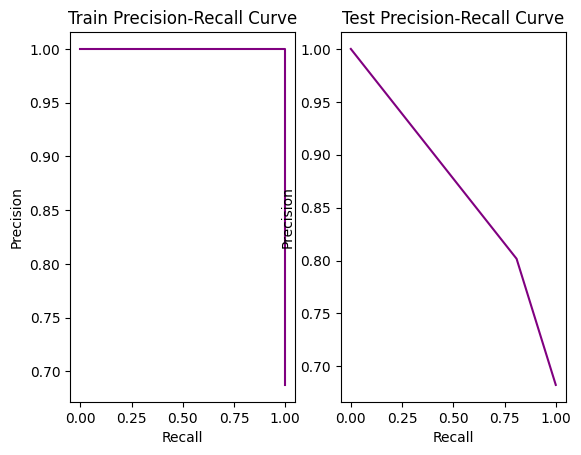

In [ ]:
import matplotlib.pyplot as plt

#create precision recall curve
fig, ax = plt.subplots(1,2)

#plot train data
ax[0].plot(training_recall_dt, training_precision_dt, color='purple')

#add axis labels to plot
ax[0].set_title('Train Precision-Recall Curve')
ax[0].set_ylabel('Precision')
ax[0].set_xlabel('Recall')



ax[1].plot(test_recall_dt, test_precision_dt, color='purple')

#add axis labels to plot
ax[1].set_title('Test Precision-Recall Curve')
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
#display plot
plt.show()